<a href="https://colab.research.google.com/github/Khushal17ad/d2i/blob/master/chapter_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression Implementation from Scratch

In [2]:
!pip install -U d2l

Requirement already up-to-date: d2l in /usr/local/lib/python3.6/dist-packages (0.15.1)


In [4]:
%matplotlib inline
from d2l import torch as d2l
import torch
import random

#### Generating the Dataset

In [6]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [11]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([1.3467, 1.2226]) 
label: tensor([2.7448])


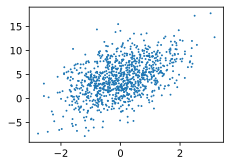

In [22]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(d2l.numpy(features[:, 0]), d2l.numpy(labels), 1);

#### Reading the Dataset

In [113]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [114]:
batch_size = 130

for X, y in data_iter(batch_size, features, labels):
    #print(X, '\n', y)
    print (y.shape)
    

torch.Size([130, 1])
torch.Size([130, 1])
torch.Size([130, 1])
torch.Size([130, 1])
torch.Size([130, 1])
torch.Size([130, 1])
torch.Size([130, 1])
torch.Size([90, 1])


#### Initializing Model Paramters

In [40]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [132]:
w

tensor([[ 1.9942],
        [-3.3917]], requires_grad=True)

#### Defining the Model

In [43]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

#### Defining the Loss Function

In [44]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#### Defining the Optimization Algorithm

In [125]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

#### Training

In [126]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l  = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
    # Compute gradient on `l` with respect to [`w`, `b`]
    l.sum().backward()
    sgd([w, b], lr, batch_size)  # Update parameters using their gradient
  with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000247
epoch 2, loss 0.000176
epoch 3, loss 0.000131


In [127]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0058, -0.0083], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0083], grad_fn=<RsubBackward1>)
